In [2]:
!pip install sympy

  Obtaining dependency information for sympy from https://files.pythonhosted.org/packages/d2/05/e6600db80270777c4a64238a98d442f0fd07cc8915be2a1c16da7f2b9e74/sympy-1.12-py3-none-any.whl.metadata
  Obtaining dependency information for mpmath>=0.19 from https://files.pythonhosted.org/packages/43/e3/7d92a15f894aa0c9c4b49b8ee9ac9850d6e63b03c9c32c0367a13ae62209/mpmath-1.3.0-py3-none-any.whl.metadata
   ---------------------------------------- 5.7/5.7 MB 9.7 MB/s eta 0:00:00
   --------------------------------------- 536.2/536.2 kB 11.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
import sympy as sp
import scipy as sc
import matplotlib.pyplot as plt

In [5]:
dfc = pd.read_csv("D:/proyeto cripto/tradingbot/cristian/scrips/by1h/BTCUSDT")
dfc  

,Tiempo,Open,High,Low,Close,Volume
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...,...
57823,2024-03-27 19:00:00,68475.60,68933.33,68468.01,68652.00,1505.426370
57824,2024-03-27 20:00:00,68652.01,69163.01,68630.00,68906.02,1062.903970
57825,2024-03-27 21:00:00,68906.01,69250.00,68900.00,68941.99,1093.453870
57826,2024-03-27 22:00:00,68942.00,69441.40,68919.46,69440.14,1447.007180


In [4]:
dft = pd.read_csv(f'C:/Users/tinma/OneDrive/Escritorio/tradingbot/csvs/historical/by1h/BTCUSDT')
dft  

,Tiempo,Open,High,Low,Close,Volume
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...,...
57823,2024-03-27 19:00:00,68475.60,68933.33,68468.01,68652.00,1505.426370
57824,2024-03-27 20:00:00,68652.01,69163.01,68630.00,68906.02,1062.903970
57825,2024-03-27 21:00:00,68906.01,69250.00,68900.00,68941.99,1093.453870
57826,2024-03-27 22:00:00,68942.00,69441.40,68919.46,69440.14,1447.007180


In [5]:
try:
    if type(dfc) == pd.core.frame.DataFrame:
        df = dfc
except:
        df = dft

In [11]:
df

,Tiempo,Open,High,Low,Close,Volume
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...,...
57823,2024-03-27 19:00:00,68475.60,68933.33,68468.01,68652.00,1505.426370
57824,2024-03-27 20:00:00,68652.01,69163.01,68630.00,68906.02,1062.903970
57825,2024-03-27 21:00:00,68906.01,69250.00,68900.00,68941.99,1093.453870
57826,2024-03-27 22:00:00,68942.00,69441.40,68919.46,69440.14,1447.007180


In [12]:
df.Tiempo = df.Tiempo.astype('datetime64')

C:\Users\tinma\AppData\Local\Temp\ipykernel_10820\2058217383.py:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df.Tiempo = df.Tiempo.astype('datetime64')


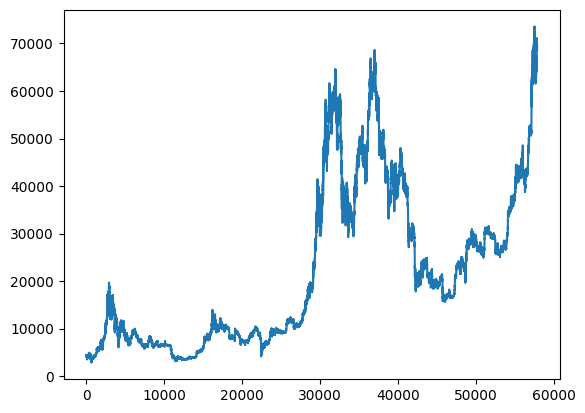

In [13]:
import matplotlib.pyplot as plt
plt.plot(df.Open)

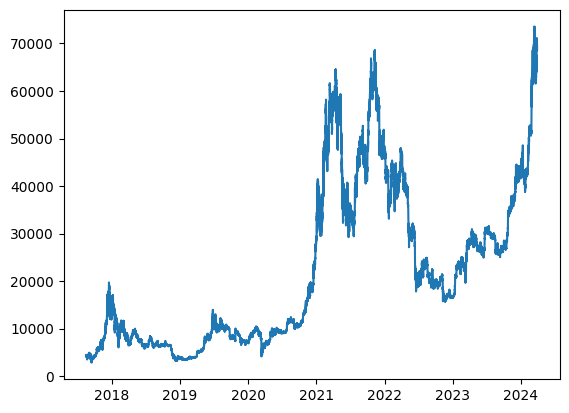

In [14]:
import matplotlib.pyplot as plt
plt.plot(df.Tiempo,df.Open)

# Análisis de Derivadas
#### Análisis de la temporalidad de 1 hora.

In [129]:
df['Interpolacion'] = sc.signal.savgol_filter(df.Open,1500,3)
df['Primer_Derivada'] = df.Interpolacion.diff()
df['PD_Interpolacion'] = sc.signal.savgol_filter(df.Primer_Derivada,1500,3)
df['Segunda_Derivada'] = df.PD_Interpolacion.diff()
df['SD_Interpolacion'] = sc.signal.savgol_filter(df.Segunda_Derivada,1500,3)
df

,Tiempo,Open,High,Low,Close,Volume,Interpolacion,Primer_Derivada,PD_Interpolacion,Segunda_Derivada,SD_Interpolacion
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,4023.392451,NaN,NaN,NaN,NaN
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,4026.192954,2.800503,NaN,NaN,NaN
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,4028.980025,2.787071,NaN,NaN,NaN
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,4031.753688,2.773663,NaN,NaN,NaN
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,4034.513965,2.760277,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
57823,2024-03-27 19:00:00,68475.60,68933.33,68468.01,68652.00,1505.426370,65717.251744,-30.094050,-32.245542,-0.183256,-0.180483
57824,2024-03-27 20:00:00,68652.01,69163.01,68630.00,68906.02,1062.903970,65686.997047,-30.254697,-32.429094,-0.183553,-0.180738
57825,2024-03-27 21:00:00,68906.01,69250.00,68900.00,68941.99,1093.453870,65656.581504,-30.415543,-32.612943,-0.183849,-0.180994
57826,2024-03-27 22:00:00,68942.00,69441.40,68919.46,69440.14,1447.007180,65626.004914,-30.576590,-32.797089,-0.184145,-0.181249


In [112]:
# Fechas de los Halvings anteriores: 28 de Noviembre de 2012, 9 de Julio de 2016, 11 de Mayo de 2020, 20 de Abril de 2024

halving_dates = ['28-11-2012','9-7-2016','11-5-2020','20-4-2024']
j = 0
for i in halving_dates:
    d = datetime.strptime(i, "%d-%m-%Y")
    halving_dates[j] = d
    j += 1
halving_dates = pd.DataFrame(halving_dates,columns=['Halving_Dates'])
halving_dates

# dft.Tiempo[dft.Tiempo]

,Halving_Dates
0,2012-11-28
1,2016-07-09
2,2020-05-11
3,2024-04-20


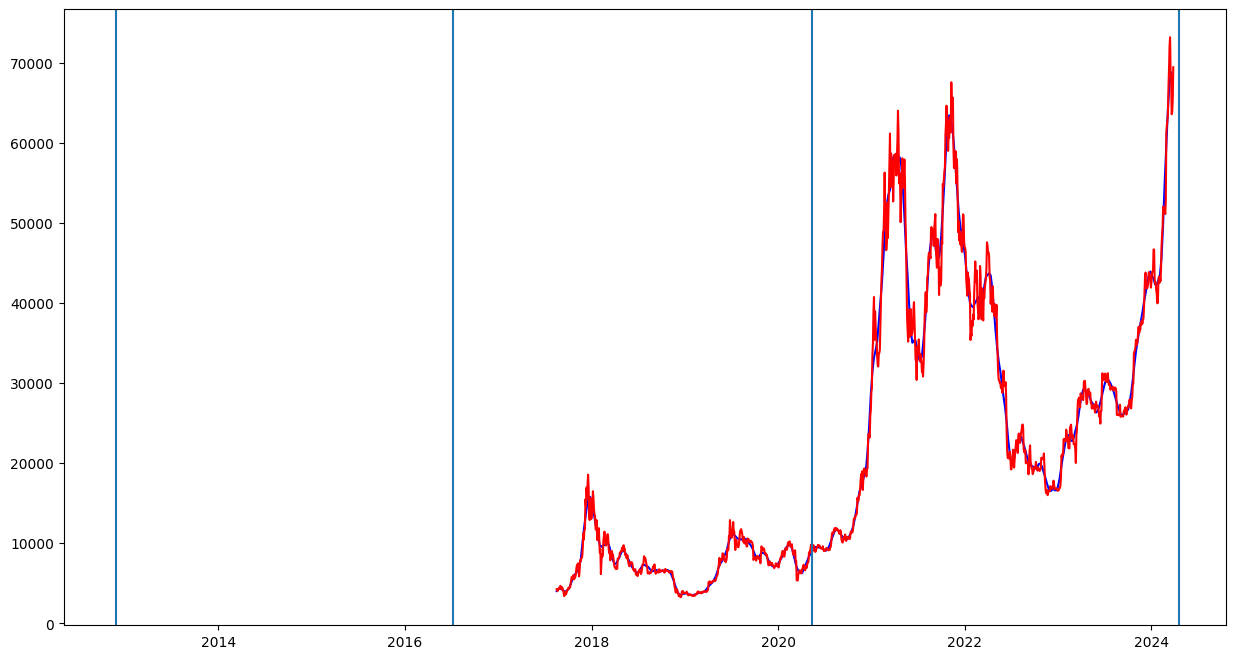

In [118]:
plt.figure(figsize=(15,8))
plt.plot(df.Tiempo[::150],df.Interpolacion[::150],color='blue')
plt.plot(df.Tiempo[::50],df.Open[::50],color='red')
for i in halving_dates['Halving_Dates']:
    plt.axvline(i);
plt.show()

### Gráfica de la primera y segunda derivada utilizando el precio

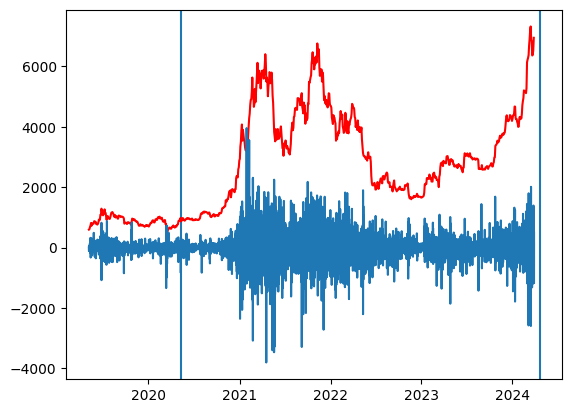

In [119]:
a = 15000
b = 60000
plt.axvline(halving_dates['Halving_Dates'][2])
plt.axvline(halving_dates['Halving_Dates'][3])
plt.plot(df.Tiempo[a:b:50],df.Open[a:b:50].multiply(0.1),color='red')
plt.plot(df.Tiempo[a:b],df.Open[a:b].diff())
# plt.plot(df.Tiempo[a:b],df.Open[a:b].diff().diff().multiply(1))

### Gráfica de la primera y segunda derivada utilizando el suavizado por medio de métodos de Fourier

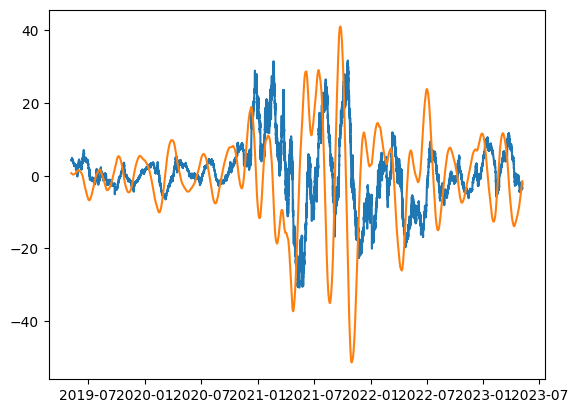

In [127]:
# Primera derivada, utilizando los datos del suavizado de Fourier en la primer derivada. Daría lo mismo si derivo primero y después suavizo.

a = 15000
b = 50000
plt.plot(df.Tiempo[a:b],df.Primer_Derivada[a:b])
plt.plot(df.Tiempo[a:b],df.PD_Interpolacion[a:b].multiply(900))

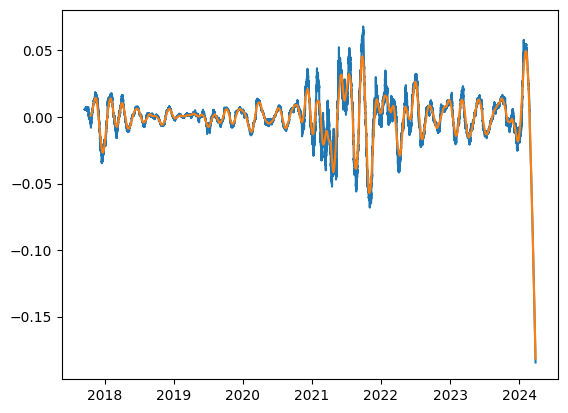

In [130]:
# Segunda derivada, utilizando los datos del suavizado de Fourier en la primer derivada. Daría lo mismo si derivo primero y después suavizo.
a = 15000
b = 60000
plt.plot(df.Tiempo,df.Segunda_Derivada)
plt.plot(df.Tiempo,df.SD_Interpolacion)

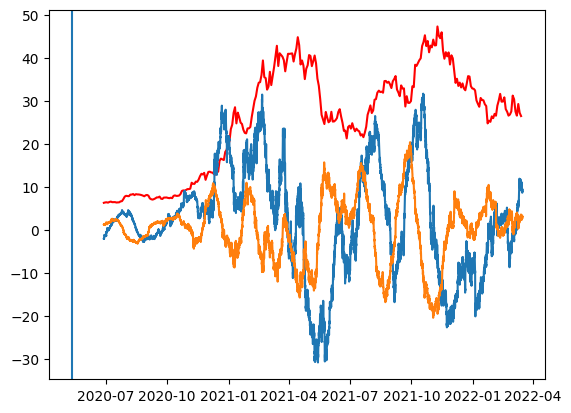

In [131]:
a = 25000
b = 40000
plt.axvline(halving_dates['Halving_Dates'][2])
# plt.axvline(halving_dates['Halving_Dates'][3])
plt.plot(df.Tiempo[a:b:50],df.Open[a:b:50].multiply(0.0007),color='red')
plt.plot(df.Tiempo[a:b],df.Primer_Derivada[a:b])
plt.plot(df.Tiempo[a:b],df.Segunda_Derivada[a:b].multiply(300))

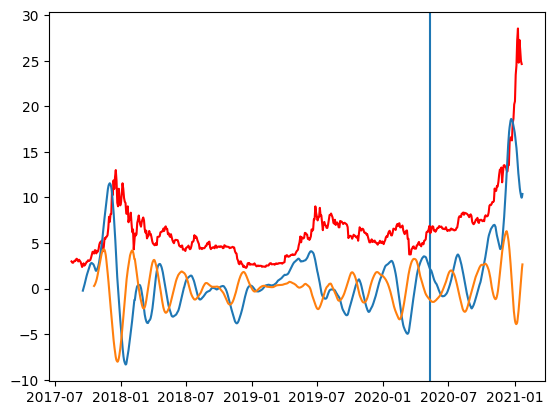

In [134]:
a = 0
b = 30000
plt.axvline(halving_dates['Halving_Dates'][2])
# plt.axvline(halving_dates['Halving_Dates'][3])
plt.plot(df.Tiempo[a:b:50],df.Open[a:b:50].multiply(0.0007),color='red')
plt.plot(df.Tiempo[a:b],df.PD_Interpolacion[a:b])
plt.plot(df.Tiempo[a:b],df.SD_Interpolacion[a:b].multiply(300))

# Análisis de Derivadas
#### Análisis de la temporalidad de 1 minuto.

In [246]:
try:
        df = pd.read_csv("D:/proyeto cripto/tradingbot/cristian/scrips/by1m/BTCUSDT")
except:
        df = pd.read_csv(f'C:/Users/tinma/OneDrive/Escritorio/tradingbot/csvs/historical/by1m/BTCUSDT')
df.Tiempo = df.Tiempo.astype('datetime64')
df['Interpolacion'] = sc.signal.savgol_filter(df.Open,125,3)
df['Primer_Derivada'] = df.Interpolacion.diff()
df['PD_Interpolacion'] = sc.signal.savgol_filter(df.Primer_Derivada,125,3)
df['Segunda_Derivada'] = df.PD_Interpolacion.diff()
df['SD_Interpolacion'] = sc.signal.savgol_filter(df.Segunda_Derivada,125,3)
df   # 3m 43.7s

,Tiempo,Open,High,Low,Close,Volume,Interpolacion,Primer_Derivada,PD_Interpolacion,Segunda_Derivada,SD_Interpolacion
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,4248.679889,NaN,NaN,NaN,NaN
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,4250.073184,1.393295,NaN,NaN,NaN
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,4251.455826,1.382641,NaN,NaN,NaN
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,4252.827693,1.371867,NaN,NaN,NaN
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,4254.188664,1.360972,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3473177,2024-03-31 02:09:00,69992.10,69992.10,69992.09,69992.10,1.172140,70034.638237,1.682428,1.968504,0.089183,0.086318
3473178,2024-03-31 02:10:00,69992.10,70019.39,69992.09,70019.38,7.438230,70036.357558,1.719321,2.061868,0.093364,0.089674
3473179,2024-03-31 02:11:00,70019.38,70085.98,70019.38,70082.00,14.504680,70038.114984,1.757426,2.159468,0.097600,0.093025
3473180,2024-03-31 02:12:00,70081.99,70116.24,70081.99,70113.39,18.548410,70039.911727,1.796743,2.261358,0.101890,0.096368


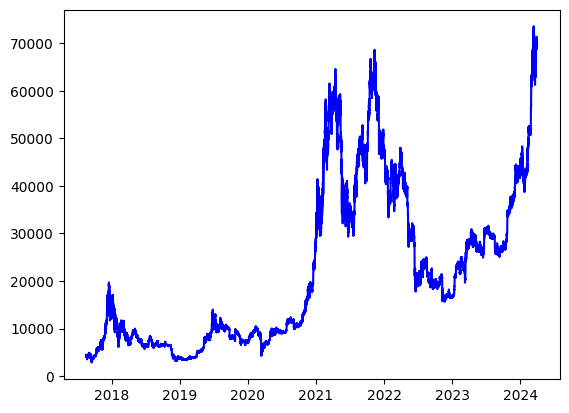

In [247]:
plt.plot(df.Tiempo[::],df.Interpolacion[::],color='blue')   # 125 datos para el suavizado con exponencial cúbica.

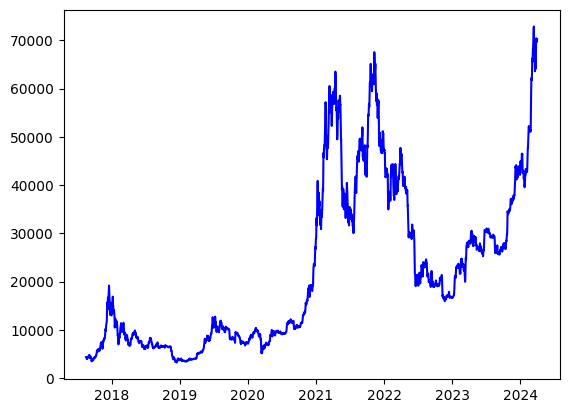

In [157]:
plt.plot(df.Tiempo[::],df.Interpolacion[::],color='blue')   # 5,000 datos para el suavizado con exponencial cúbica.

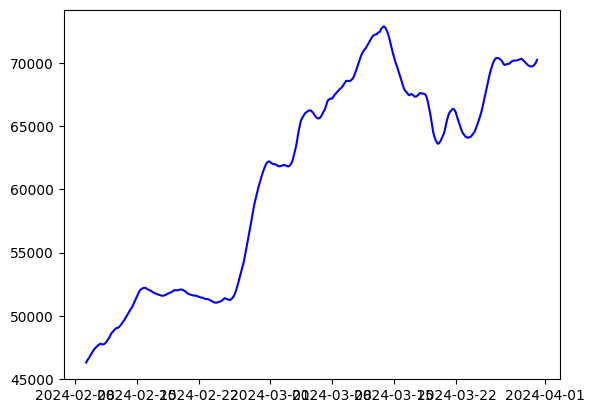

In [166]:
plt.plot(df.Tiempo[3400000::],df.Interpolacion[3400000::],color='blue')  

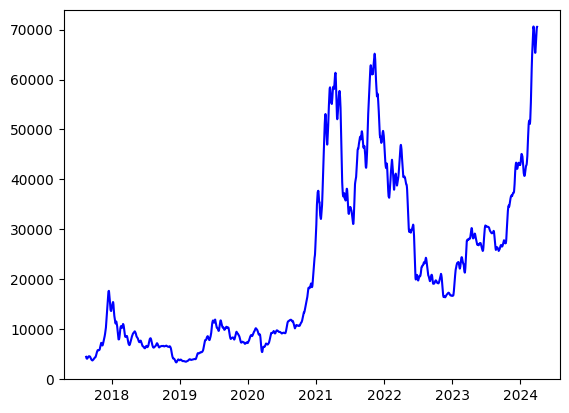

In [151]:
plt.plot(df.Tiempo[::],df.Interpolacion[::],color='blue')   # 25,000 datos para el suavizado con exponencial cúbica.

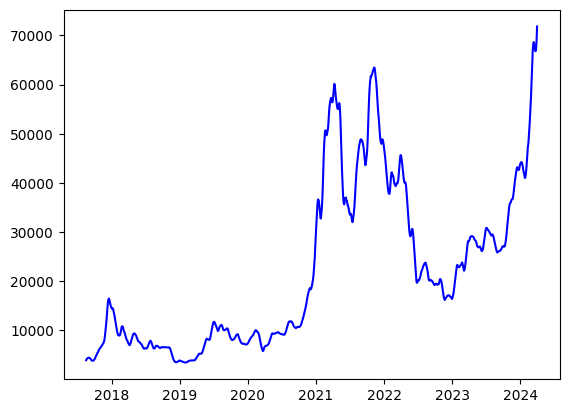

In [153]:
plt.plot(df.Tiempo[::],df.Interpolacion[::],color='blue')   # 50,000 datos para el suavizado con exponencial cúbica.

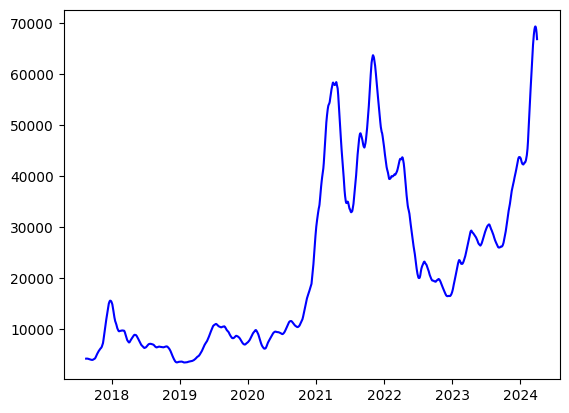

In [155]:
plt.plot(df.Tiempo[::],df.Interpolacion[::],color='blue')   # 100,000 datos para el suavizado con exponencial cúbica.

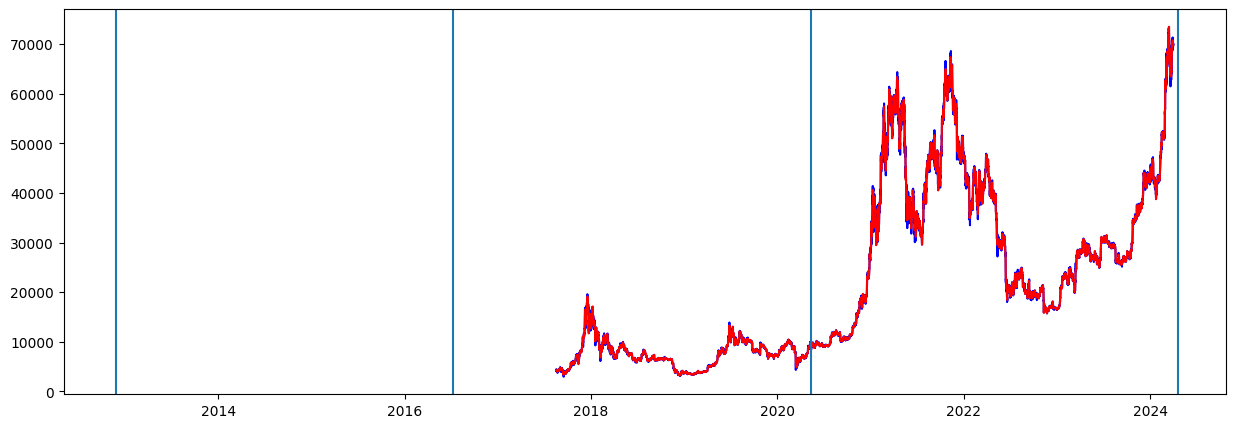

In [251]:
plt.figure(figsize=(15,5))
plt.plot(df.Tiempo[::150],df.Interpolacion[::150],color='blue')
plt.plot(df.Tiempo[::1000],df.Open[::1000],color='red')
for i in halving_dates['Halving_Dates']:
    plt.axvline(i);
plt.show()

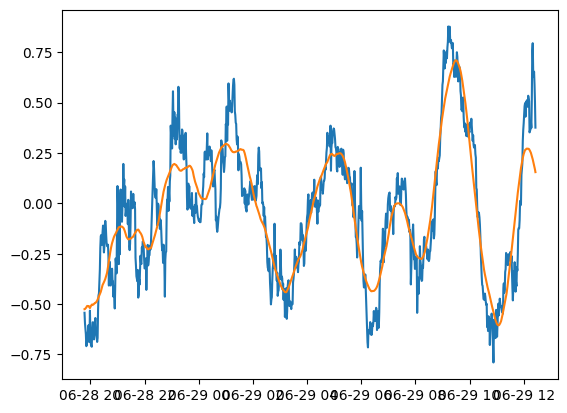

In [250]:
# Primera derivada, utilizando los datos del suavizado de Fourier en la primer derivada. Daría lo mismo si derivo primero y después suavizo.

a = 0
b = 1000
d = 1500000
plt.plot(df.Tiempo[a+d:b+d],df.Primer_Derivada[a+d:b+d])
plt.plot(df.Tiempo[a+d:b+d],df.PD_Interpolacion[a+d:b+d].multiply(1))

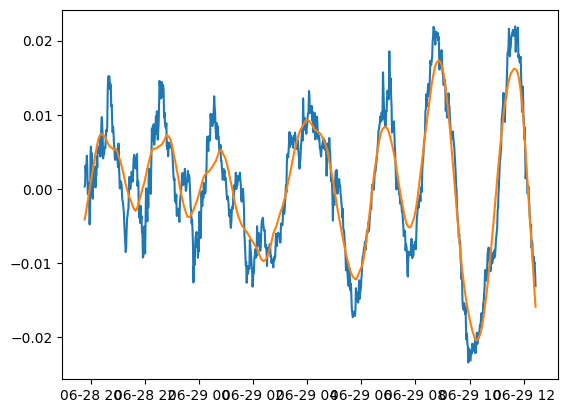

In [253]:
# Segunda derivada, utilizando los datos del suavizado de Fourier en la primer derivada. Daría lo mismo si derivo primero y después suavizo.

a = 0
b = 1000
d = 1500000
plt.plot(df.Tiempo[a+d:b+d],df.Segunda_Derivada[a+d:b+d])
plt.plot(df.Tiempo[a+d:b+d],df.SD_Interpolacion[a+d:b+d])

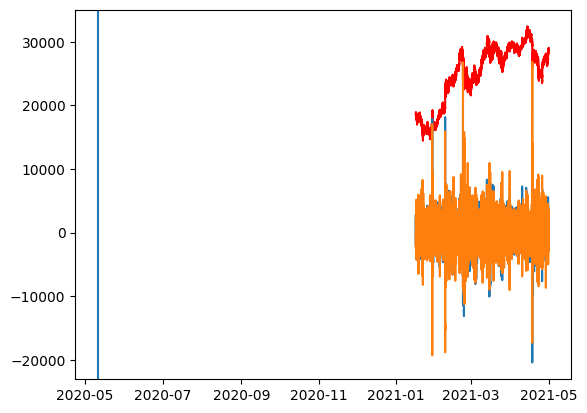

In [389]:


a = 0
b = 150000
d = 1790000
plt.axvline(halving_dates['Halving_Dates'][2])
# plt.axvline(halving_dates['Halving_Dates'][3])
plt.plot(df.Tiempo[a+d:b+d],df.Open[a+d:b+d].multiply(0.5),color='red')
plt.plot(df.Tiempo[a+d:b+d],df.Primer_Derivada[a+d:b+d].multiply(220))
plt.plot(df.Tiempo[a+d:b+d],df.Segunda_Derivada[a+d:b+d].multiply(10000))

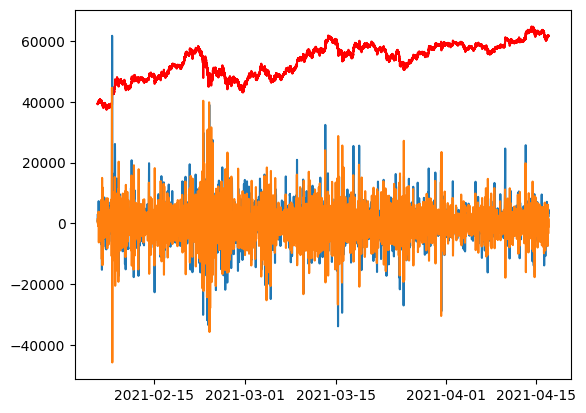

In [396]:

a = 0
b = 100000
d = 1820000
# plt.axvline(halving_dates['Halving_Dates'][2])
# plt.axvline(halving_dates['Halving_Dates'][3])
plt.plot(df.Tiempo[a+d:b+d],df.Open[a+d:b+d].multiply(1),color='red')
plt.plot(df.Tiempo[a+d:b+d],df.PD_Interpolacion[a+d:b+d].multiply(900))
plt.plot(df.Tiempo[a+d:b+d],df.SD_Interpolacion[a+d:b+d].multiply(35000))

# Análisis de Fourier

c:\Users\tinma\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


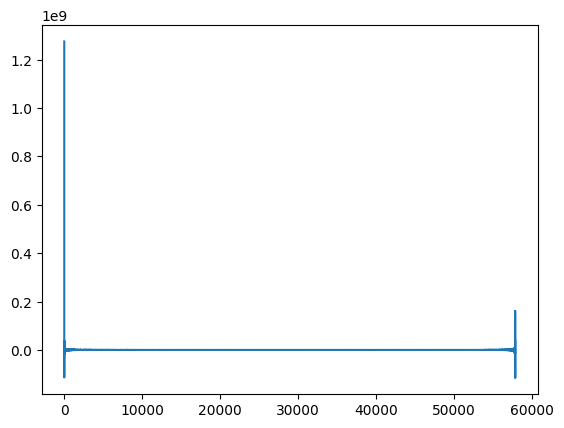

In [19]:
# from .fft import fft, fftfreq

yf = sc.fft.fft(dft.Open.to_numpy())
dft['Fourier_Freq'] = yf

plt.plot(dft.Fourier_Freq)


In [1]:
plt.plot(dft.Fourier_Freq[:15])

NameError: name 'plt' is not defined

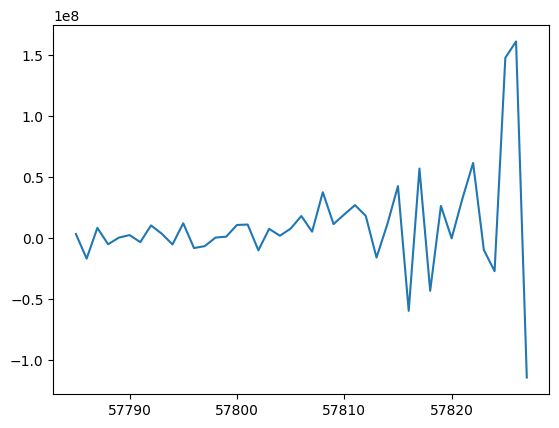

In [32]:
plt.plot(dft.Fourier_Freq[57785:])